In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
df= pd.read_csv("rainfall.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [61]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [62]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [64]:
df.drop(["Date"],axis=1,inplace=True)

In [65]:
df["MinTemp"].value_counts()

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

In [66]:
df['MinTemp'].replace(np.nan, 12.0 , inplace=True)

In [67]:
df["MaxTemp"].value_counts()

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

In [68]:
df['MaxTemp'].replace(np.nan, 19.0 , inplace=True)

In [69]:
df["Rainfall"].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [70]:
df['Rainfall'].replace(np.nan, 0.0 , inplace=True)

In [71]:
df["Evaporation"].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [72]:
df['Evaporation'].replace(np.nan, np.mean(df['Evaporation']) , inplace=True)

In [73]:
df["Sunshine"].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [74]:
df['Sunshine'].replace(np.nan, np.mean(df['Sunshine']) , inplace=True)

In [75]:
df["WindGustDir"].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [76]:
df['WindGustDir'].replace(np.nan, 'N' , inplace=True)

In [107]:
df["WindGustSpeed"].value_counts()

40.174469     991
39.000000     441
35.000000     435
37.000000     422
33.000000     408
31.000000     396
41.000000     371
30.000000     367
28.000000     332
43.000000     302
48.000000     292
26.000000     275
50.000000     259
46.000000     258
24.000000     255
52.000000     249
44.000000     241
22.000000     223
54.000000     210
20.000000     186
56.000000     153
57.000000     148
19.000000     137
61.000000     114
59.000000     113
63.000000      95
17.000000      92
65.000000      74
67.000000      64
72.000000      62
15.000000      58
13.000000      57
74.000000      54
70.000000      53
69.000000      49
76.000000      44
78.000000      23
80.000000      22
11.000000      18
85.000000      14
81.000000      13
91.000000      12
89.000000       7
93.000000       7
9.000000        6
83.000000       6
98.000000       4
94.000000       3
87.000000       3
102.000000      2
100.000000      2
7.000000        2
107.000000      1
Name: WindGustSpeed, dtype: int64

In [108]:
df['WindGustSpeed'].replace(np.nan, np.mean(df['WindGustSpeed']) , inplace=True)

In [79]:
df["WindDir9am"].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [80]:
df['WindDir9am'].replace(np.nan, 'N' , inplace=True)

In [81]:
df["WindDir3pm"].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [117]:
df['WindDir3pm'].replace(np.nan, 'SE' , inplace=True)

In [111]:
df["Humidity9am"].value_counts()

73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

In [115]:
df['Humidity9am'].replace(np.nan, 73.0 , inplace=True)

In [85]:
df["Humidity3pm"].value_counts()

55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64

In [104]:
df['Humidity3pm'].replace(np.nan, 55.0 , inplace=True)

In [114]:
df["Pressure9am"].value_counts()

1017.640233    1309
1014.800000      58
1019.200000      55
1016.100000      54
1019.600000      53
               ... 
1037.300000       1
997.800000        1
1036.900000       1
1036.300000       1
1033.600000       1
Name: Pressure9am, Length: 385, dtype: int64

In [88]:
df['Pressure9am'].replace(np.nan, np.mean(df['Pressure9am']) , inplace=True)

In [89]:
df["Pressure3pm"].value_counts()

1017.8    60
1018.0    57
1019.8    53
1017.9    53
1015.5    52
          ..
982.9      1
994.3      1
998.9      1
1030.0     1
1029.5     1
Name: Pressure3pm, Length: 374, dtype: int64

In [90]:
df['Pressure3pm'].replace(np.nan, np.mean(df['Pressure3pm']) , inplace=True)

In [91]:
df["Cloud9am"].value_counts()

7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

In [92]:
df['Cloud9am'].replace(np.nan, 7.0 , inplace=True)

In [93]:
df["Cloud3pm"].value_counts()

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

In [94]:
df['Cloud3pm'].replace(np.nan, 7.0 , inplace=True)

In [95]:
df["Temp9am"].value_counts()

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64

In [96]:
df['Temp9am'].replace(np.nan, np.mean(df['Temp9am']) , inplace=True)

In [97]:
df["Temp3pm"].value_counts()

19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64

In [98]:
df['Temp3pm'].replace(np.nan, np.mean(df['Temp3pm']) , inplace=True)

In [99]:
df["RainToday"].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [100]:
df['RainToday'].replace(np.nan, 'No' , inplace=True)

In [101]:
df["RainTomorrow"].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [102]:
df['RainTomorrow'].replace(np.nan, 'No' , inplace=True)

In [119]:
df["WindSpeed9am"].value_counts()

9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

In [120]:
df['WindSpeed9am'].replace(np.nan, np.mean(df['WindSpeed9am']) , inplace=True)

In [122]:
df["WindSpeed3pm"].value_counts()

9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

In [123]:
df['WindSpeed3pm'].replace(np.nan, np.mean(df['WindSpeed3pm']) , inplace=True)

In [124]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

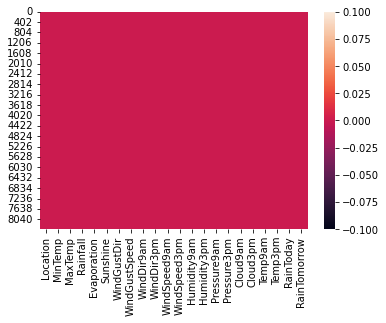

In [125]:
sns.heatmap(df.isnull())

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [127]:
obj_columns=df[["Location","RainToday","RainTomorrow","WindDir3pm","WindDir9am","WindGustDir"]].copy()

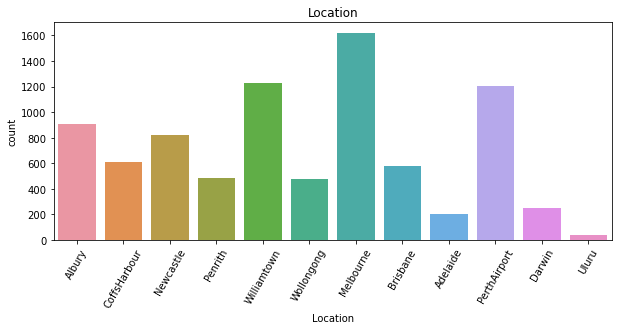

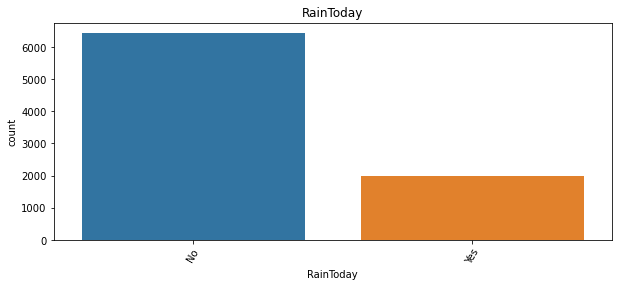

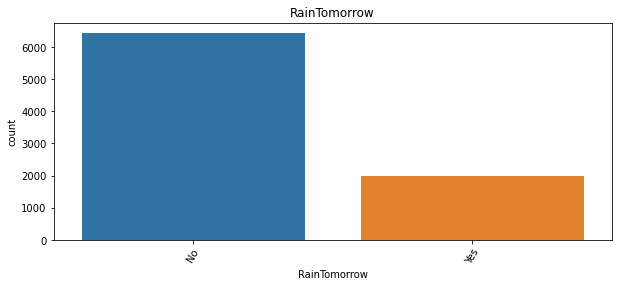

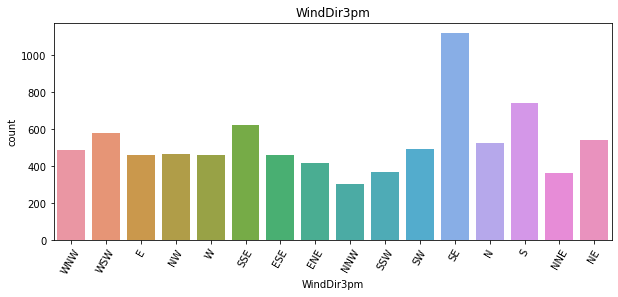

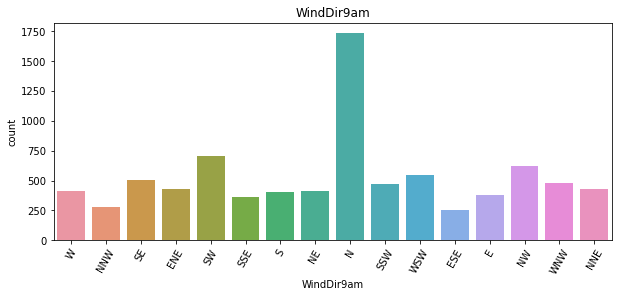

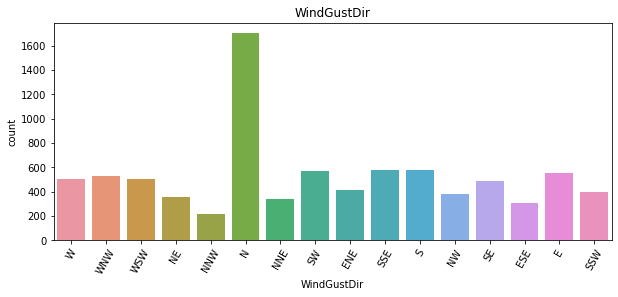

In [128]:
for col in obj_columns.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.countplot(obj_columns[col])
    plt.title(col)
    plt.xticks(rotation=60)
    plt.show()

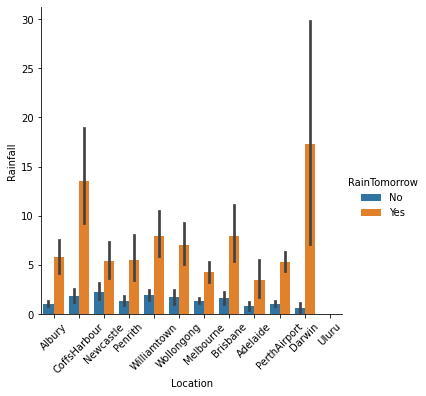

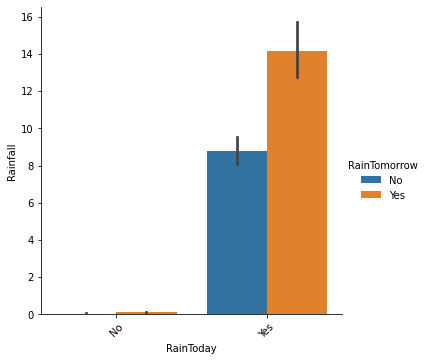

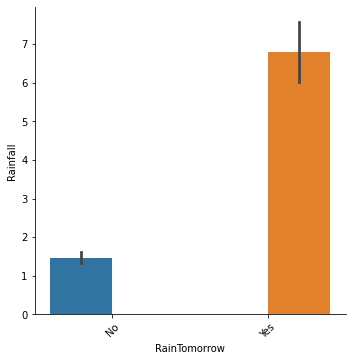

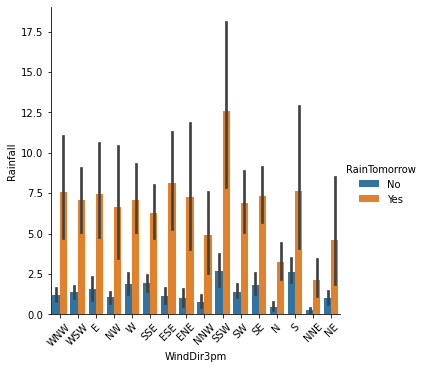

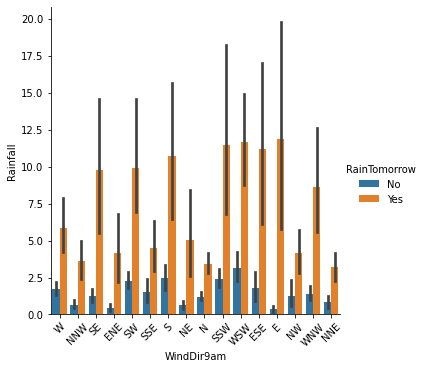

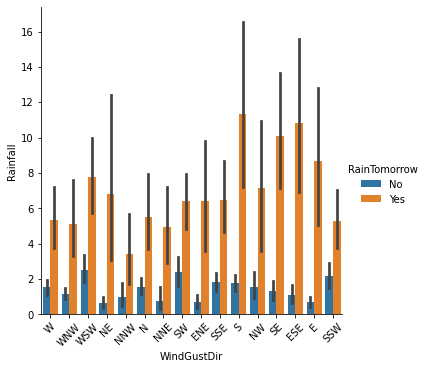

In [129]:
for col in obj_columns.columns:
    sns.catplot(x=col,y='Rainfall',hue="RainTomorrow",data=df,kind="bar")
    plt.xticks(rotation=45)

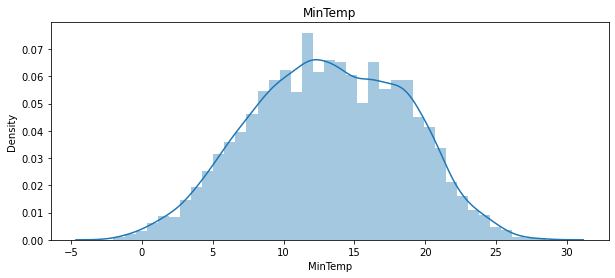

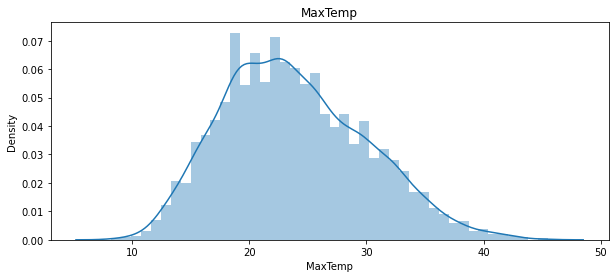

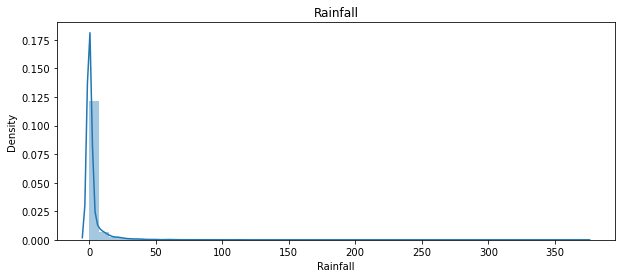

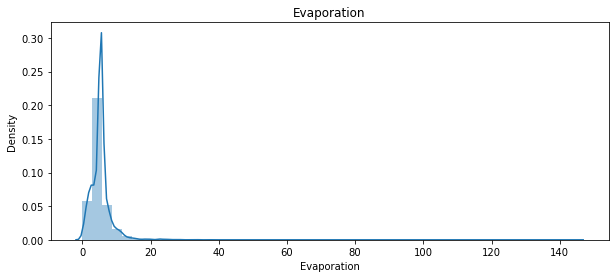

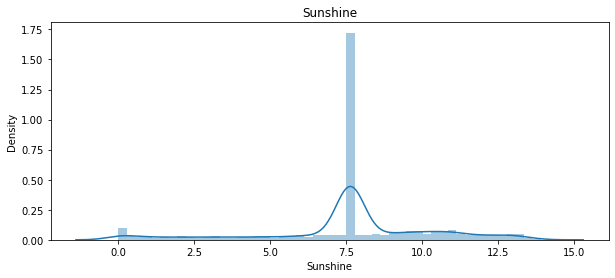

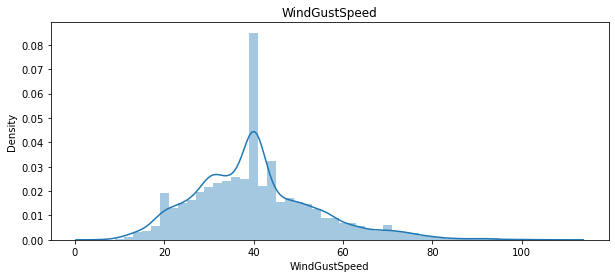

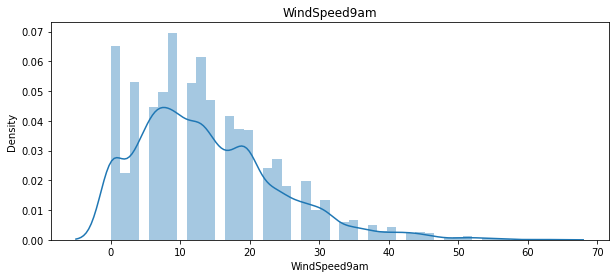

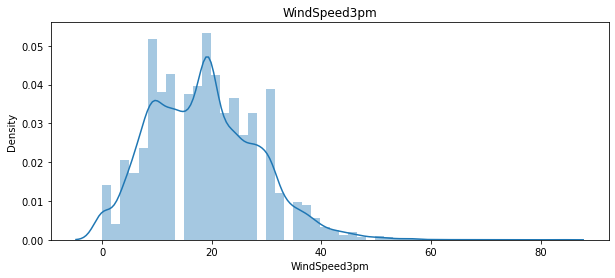

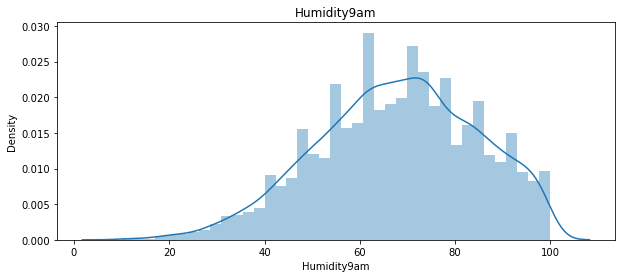

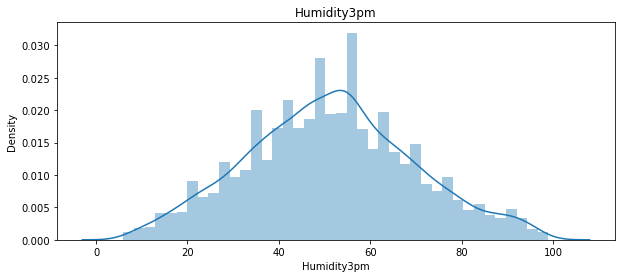

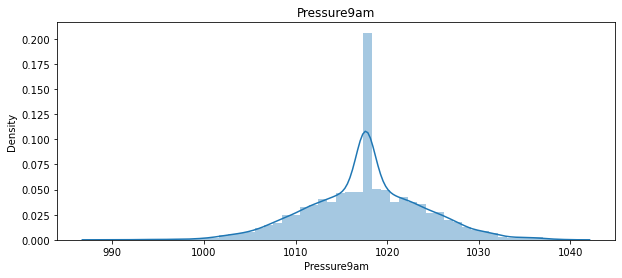

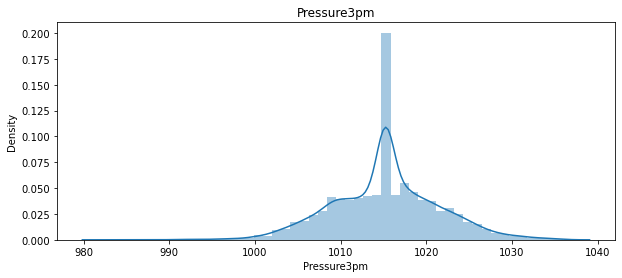

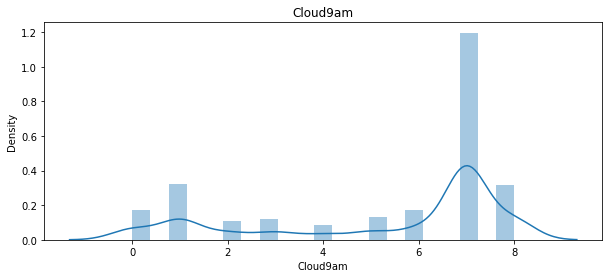

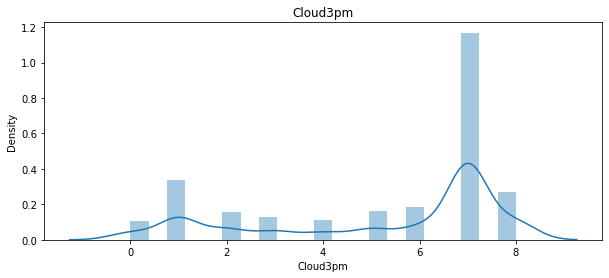

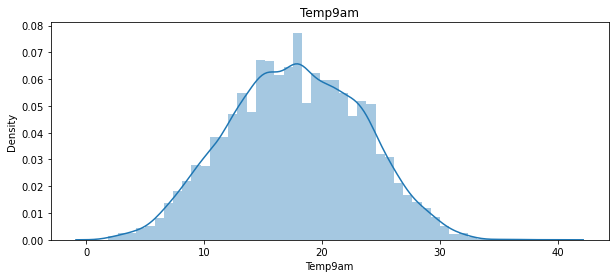

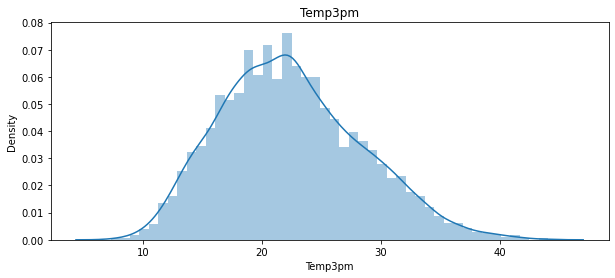

In [131]:
df_numeric=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']].copy()
for col in df_numeric.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.distplot(df_numeric[col])
    plt.title(col)
    plt.show()

In [132]:
df.skew()

MinTemp          -0.084104
MaxTemp           0.391512
Rainfall         13.200523
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.262767
Humidity3pm       0.110858
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.863322
Cloud3pm         -0.804407
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [133]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [134]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= oe.fit_transform(df[i].values.reshape(-1,1))

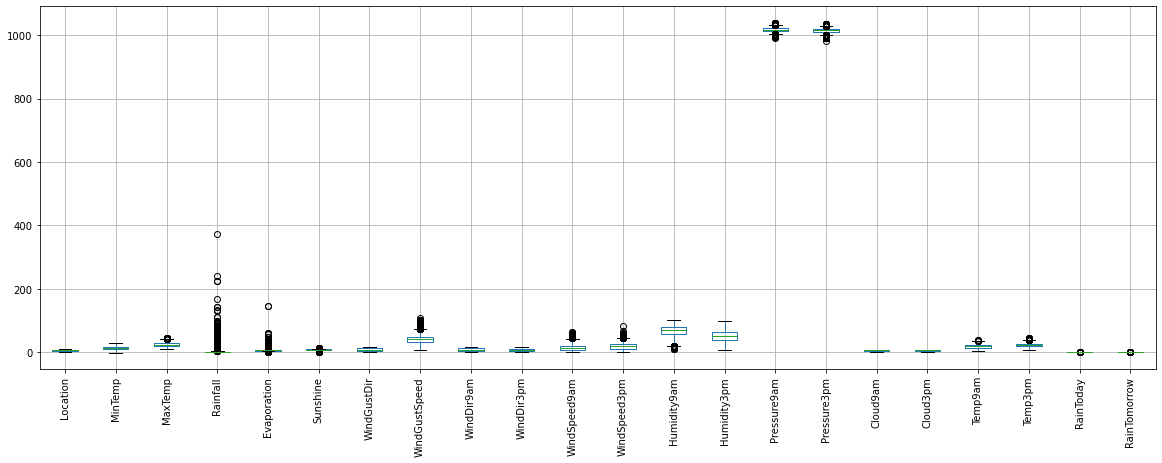

In [135]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [136]:
import scipy
from scipy.stats import zscore

In [137]:
z= np.abs(zscore(df))
print(z)

      Location   MinTemp   MaxTemp  Rainfall   Evaporation      Sunshine  \
0     1.515776  0.040391  0.151011  0.206021  2.305893e-16  1.257472e-15   
1     1.515776  1.074781  0.208009  0.264165  2.305893e-16  1.257472e-15   
2     1.515776  0.052540  0.305923  0.264165  2.305893e-16  1.257472e-15   
3     1.515776  0.740229  0.681262  0.264165  2.305893e-16  1.257472e-15   
4     1.515776  0.802425  1.382983  0.167258  2.305893e-16  1.257472e-15   
...        ...       ...       ...       ...           ...           ...   
8420  1.013895  1.929746  0.069416  0.264165  2.305893e-16  1.257472e-15   
8421  1.013895  1.781056  0.240647  0.264165  2.305893e-16  1.257472e-15   
8422  1.013895  1.446505  0.501752  0.264165  2.305893e-16  1.257472e-15   
8423  1.013895  1.000436  0.518071  0.264165  2.305893e-16  1.257472e-15   
8424  1.013895  0.319184  0.787455  0.264165  2.305893e-16  1.257472e-15   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0        

In [138]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

In [139]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(7987, 22)

In [140]:
df.shape

(8425, 22)

In [141]:
dataloss=(8425-7987)/8425*100
dataloss

5.198813056379822

In [143]:
df_new.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,...,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000
mean,5.754977,13.085489,23.738500,1.857005,5.134497,7.669640,7.220483,39.344773,7.272818,7.814824,...,68.005509,51.325028,1017.794155,1015.384942,5.238763,5.199199,17.669422,22.375438,0.227369,0.228121
std,3.152472,5.382877,6.018746,4.753794,2.307254,2.799213,4.701891,12.786265,4.581134,4.417583,...,16.477906,18.032313,5.983365,5.926165,2.674786,2.570276,5.571857,5.836843,0.419159,0.419647
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,18.000000,6.000000,999.000000,996.700000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,3.000000,9.100000,19.200000,0.000000,3.800000,7.632205,3.000000,31.000000,3.000000,4.000000,...,57.000000,39.000000,1014.200000,1011.700000,3.000000,3.000000,13.700000,18.100000,0.000000,0.000000
50%,6.000000,13.100000,23.200000,0.000000,5.389395,7.632205,7.000000,39.000000,7.000000,8.000000,...,69.000000,51.000000,1017.640233,1015.236075,7.000000,7.000000,17.762015,22.000000,0.000000,0.000000
75%,8.000000,17.200000,27.900000,0.600000,5.389395,9.000000,12.000000,46.000000,12.000000,11.000000,...,80.000000,63.000000,1021.400000,1018.900000,7.000000,7.000000,21.800000,26.200000,0.000000,0.000000
max,11.000000,28.300000,42.000000,33.400000,16.600000,13.900000,15.000000,81.000000,15.000000,15.000000,...,100.000000,99.000000,1036.300000,1033.800000,8.000000,8.000000,34.500000,40.100000,1.000000,1.000000


<AxesSubplot:>

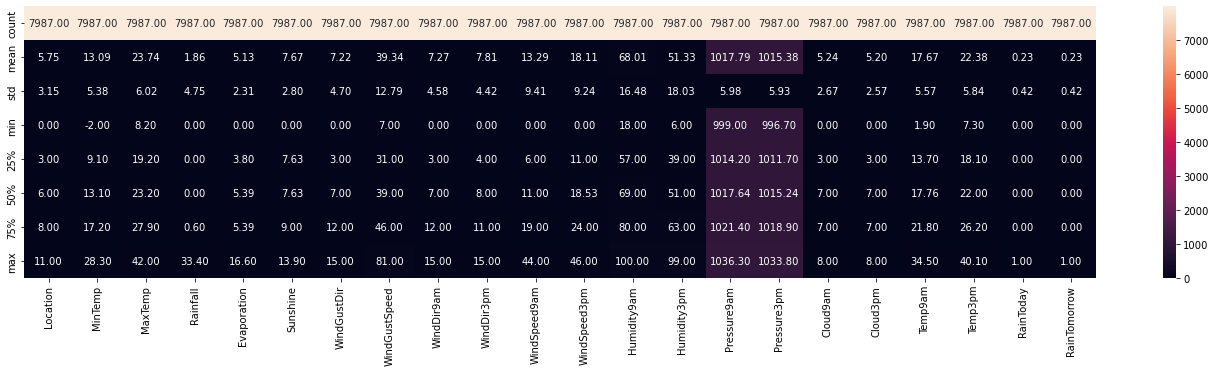

In [144]:
plt.figure(figsize=(24,5))
sns.heatmap(df_new.describe(),annot=True,fmt="0.2f")

In [145]:
df_new.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.116350,0.063145,0.017936,0.132245,0.048579,-0.037707,0.245658,-0.041030,-0.031195,...,0.004329,0.060371,-0.024265,-0.012288,0.037961,0.017429,0.118100,0.060707,0.002934,0.009222
MinTemp,0.116350,1.000000,0.717487,0.089066,0.372277,0.065667,-0.153425,0.231014,-0.043667,-0.154353,...,-0.126806,0.088692,-0.432755,-0.427573,0.012365,-0.042279,0.888639,0.687633,0.062205,0.090636
MaxTemp,0.063145,0.717487,1.000000,-0.137021,0.467049,0.385972,-0.231951,0.135624,-0.213508,-0.190636,...,-0.383206,-0.410730,-0.332335,-0.412797,-0.242666,-0.243933,0.863397,0.972797,-0.217629,-0.147504
Rainfall,0.017936,0.089066,-0.137021,1.000000,-0.092388,-0.161877,0.081196,0.088198,0.121580,0.074577,...,0.294067,0.288798,-0.098433,-0.039030,0.156627,0.125887,-0.033526,-0.146589,0.697522,0.267970
Evaporation,0.132245,0.372277,0.467049,-0.092388,1.000000,0.369080,-0.121384,0.200769,-0.115309,-0.036752,...,-0.324991,-0.231213,-0.262043,-0.275720,-0.098790,-0.125642,0.439628,0.454352,-0.163847,-0.089365
Sunshine,0.048579,0.065667,0.385972,-0.161877,0.369080,1.000000,-0.104739,0.009797,-0.076595,-0.069789,...,-0.366405,-0.437407,-0.004078,-0.063832,-0.499991,-0.507987,0.261680,0.403489,-0.219089,-0.317675
WindGustDir,-0.037707,-0.153425,-0.231951,0.081196,-0.121384,-0.104739,1.000000,0.005465,0.405681,0.507292,...,0.029372,0.048760,-0.095047,-0.008263,0.163024,0.126991,-0.185080,-0.249791,0.121709,0.044378
WindGustSpeed,0.245658,0.231014,0.135624,0.088198,0.200769,0.009797,0.005465,1.000000,-0.069460,0.076737,...,-0.263671,-0.084788,-0.377284,-0.336132,-0.022405,0.007114,0.198936,0.101786,0.076677,0.181478
WindDir9am,-0.041030,-0.043667,-0.213508,0.121580,-0.115309,-0.076595,0.405681,-0.069460,1.000000,0.243622,...,0.007566,0.116457,-0.003943,0.081400,0.090957,0.064615,-0.101576,-0.224390,0.149239,0.027091
WindDir3pm,-0.031195,-0.154353,-0.190636,0.074577,-0.036752,-0.069789,0.507292,0.076737,0.243622,1.000000,...,-0.007524,-0.008613,-0.129842,-0.037280,0.081018,0.055821,-0.172000,-0.202000,0.100983,0.003674


<AxesSubplot:>

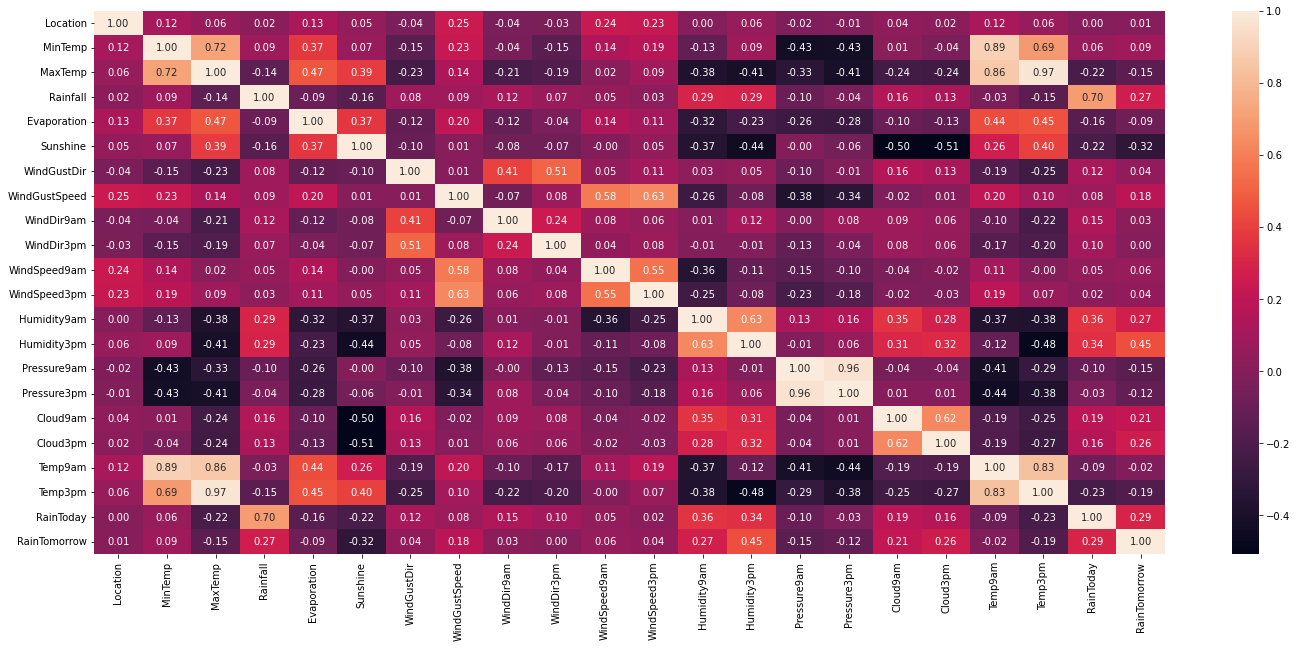

In [148]:
plt.figure(figsize=(24,10))
sns.heatmap(df_new.corr(),annot=True,fmt="0.2f")

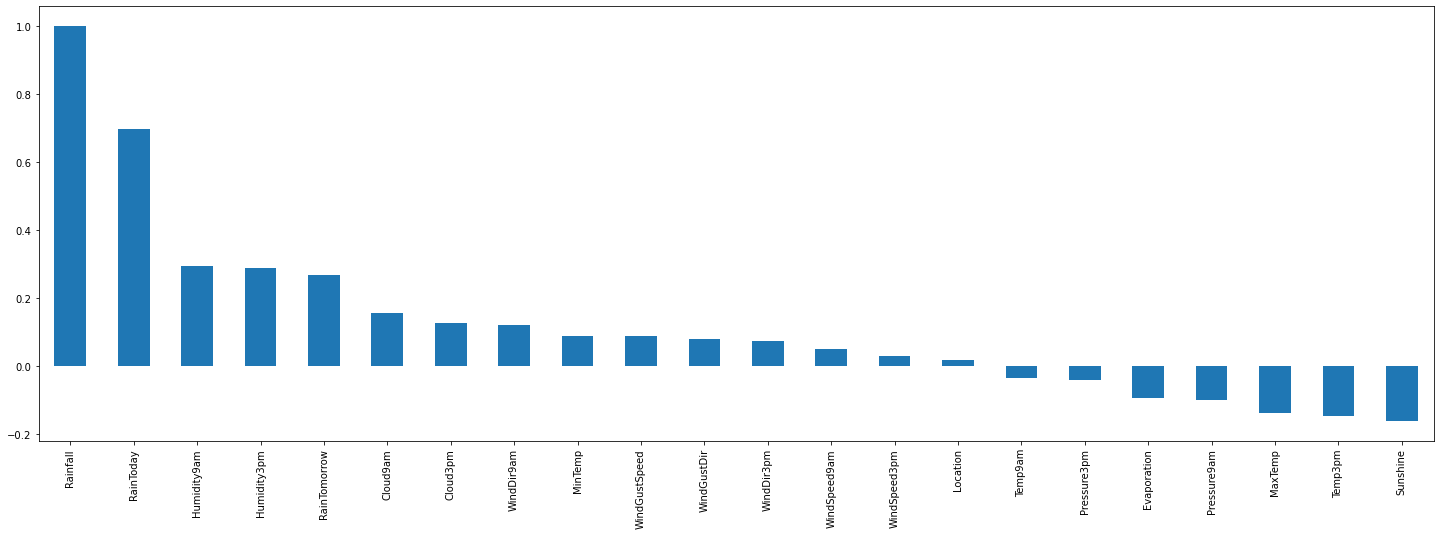

In [151]:
plt.figure(figsize=(25,8))
df_new.corr()["Rainfall"].sort_values(ascending=False).plot(kind="bar")
plt.show()

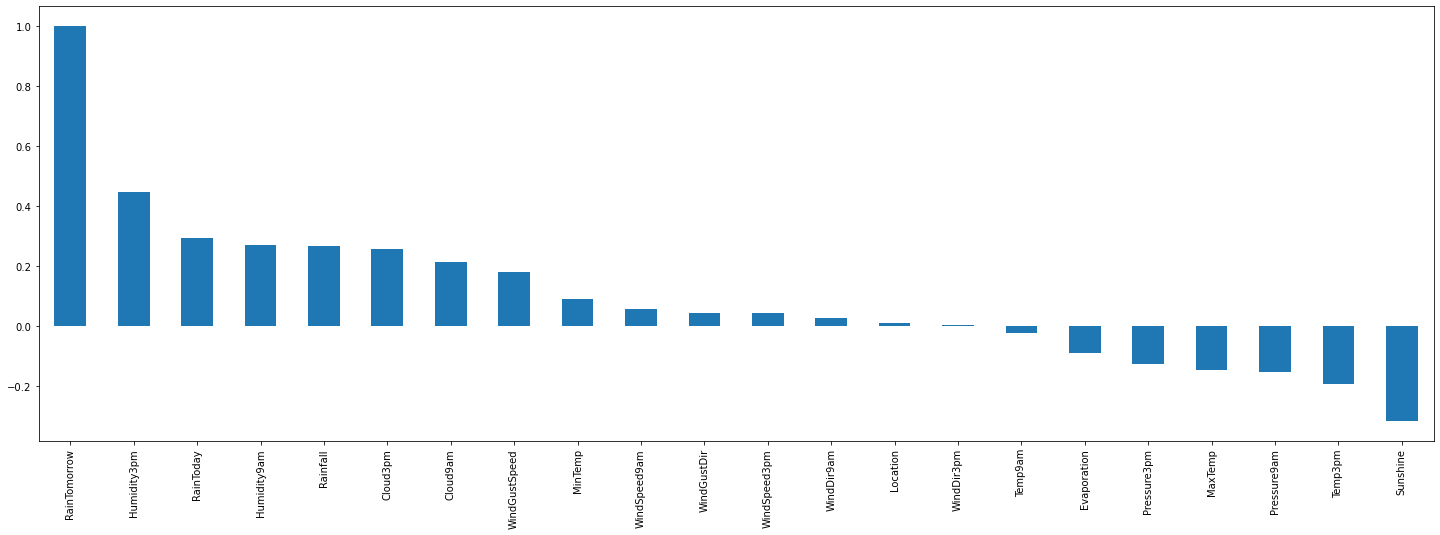

In [152]:
plt.figure(figsize=(25,8))
df_new.corr()["RainTomorrow"].sort_values(ascending=False).plot(kind="bar")
plt.show()

In [154]:
x2=df_new.drop(["Rainfall"],axis=1)
y2=df_new["Rainfall"]
x1=df_new.drop(["RainTomorrow"],axis=1)
y1=df_new["RainTomorrow"]
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(7987, 21)
(7987,)
(7987, 21)
(7987,)


In [155]:
from sklearn.preprocessing import power_transform
xt=power_transform(x1, method="yeo-johnson")
xt=pd.DataFrame(xt)
xt.columns = x1.columns
xt

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.568421,0.063394,-0.065860,0.773058,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,...,0.670390,0.148687,-1.678865,-1.692943,-1.405096,1.174785,0.705586,-0.134269,-0.027061,-0.542476
1,-1.568421,-1.054786,0.295847,-0.654231,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,...,0.472699,-1.430228,-1.492546,-1.203853,-1.284708,0.656081,0.705586,-0.080445,0.392529,-0.542476
2,-1.568421,-0.029270,0.391255,-0.654231,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,...,0.863753,-1.749113,-1.189427,-1.709835,-1.130218,0.656081,-1.316544,0.599608,0.210969,-0.542476
3,-1.568421,-0.717748,0.745385,-0.654231,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,...,-0.966158,-1.375808,-2.064072,-0.029358,-0.430600,0.656081,0.705586,0.080903,0.742575,-0.542476
4,-1.568421,0.820504,1.364220,1.135607,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,...,0.270193,0.848497,-1.011381,-1.170177,-1.594683,0.656081,1.237711,0.027141,1.224291,-0.542476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.016329,-1.925521,0.018067,-0.654231,0.186311,-0.097439,-1.838176,-0.605532,0.469967,-1.591859,...,-0.720808,-1.042145,-1.554249,1.136655,0.831742,0.656081,0.705586,-1.360956,0.075946,-0.542476
7983,1.016329,-1.772792,0.327797,-0.654231,0.186311,-0.097439,-0.124576,-1.460065,0.469967,-1.076782,...,-0.966158,-0.755256,-1.741820,0.953981,0.631266,0.656081,0.705586,-1.215872,0.425052,-0.542476
7984,1.016329,-1.431382,0.578234,-0.654231,0.186311,-0.097439,-0.834587,-0.103212,0.469967,1.354048,...,-0.966158,-0.928319,-1.554249,0.538043,0.245431,0.656081,0.705586,-0.926387,0.680153,-0.542476
7985,1.016329,-0.979749,0.593593,-0.654231,0.186311,-0.097439,0.469851,-0.874832,0.657373,-1.076782,...,-1.225561,-1.042145,-1.554249,0.271279,0.194951,-1.010872,-1.316544,-0.457681,0.664465,-0.542476


In [156]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
def calc_vif(xt):
    vif = pd.DataFrame()
    vif["variables"] = xt.columns
    vif["V_I_F"] = [variance_inflation_factor(xt.values,i) for i in range(xt.shape[1])]
    return(vif)

In [158]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

        variables      V_I_F
0        Location   1.177041
1         MinTemp   8.177197
2         MaxTemp  23.780233
3        Rainfall   8.399751
4     Evaporation   1.568885
5        Sunshine   2.074383
6     WindGustDir   1.622197
7   WindGustSpeed   2.210396
8      WindDir9am   1.336034
9      WindDir3pm   1.477240
10   WindSpeed9am   1.969670
11   WindSpeed3pm   1.955466
12    Humidity9am   3.887713
13    Humidity3pm   5.184084
14    Pressure9am  19.636852
15    Pressure3pm  18.640128
16       Cloud9am   1.973140
17       Cloud3pm   1.825269
18        Temp9am  17.395283
19        Temp3pm  30.433777
20      RainToday   7.789092


19    30.433777
2     23.780233
14    19.636852
15    18.640128
18    17.395283
3      8.399751
1      8.177197
20     7.789092
13     5.184084
12     3.887713
7      2.210396
5      2.074383
16     1.973140
10     1.969670
11     1.955466
17     1.825269
6      1.622197
4      1.568885
9      1.477240
8      1.336034
0      1.177041
Name: V_I_F, dtype: float64

In [159]:
xt.drop(["Temp3pm","Pressure9am"],axis=1,inplace=True)

In [160]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

        variables      V_I_F
0        Location   1.172316
1         MinTemp   7.974405
2         MaxTemp   9.224579
3        Rainfall   8.380492
4     Evaporation   1.551603
5        Sunshine   2.067310
6     WindGustDir   1.600618
7   WindGustSpeed   2.174447
8      WindDir9am   1.312356
9      WindDir3pm   1.413071
10   WindSpeed9am   1.963449
11   WindSpeed3pm   1.943851
12    Humidity9am   3.418228
13    Humidity3pm   3.483857
14    Pressure3pm   1.431066
15       Cloud9am   1.972937
16       Cloud3pm   1.822449
17        Temp9am  15.880775
18      RainToday   7.788584


17    15.880775
2      9.224579
3      8.380492
1      7.974405
18     7.788584
13     3.483857
12     3.418228
7      2.174447
5      2.067310
15     1.972937
10     1.963449
11     1.943851
16     1.822449
6      1.600618
4      1.551603
14     1.431066
9      1.413071
8      1.312356
0      1.172316
Name: V_I_F, dtype: float64

In [161]:
xt.drop(["Temp9am"],axis=1,inplace=True)

In [162]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

        variables     V_I_F
0        Location  1.163538
1         MinTemp  4.373297
2         MaxTemp  5.357258
3        Rainfall  8.375684
4     Evaporation  1.551596
5        Sunshine  2.065534
6     WindGustDir  1.600608
7   WindGustSpeed  2.143707
8      WindDir9am  1.312353
9      WindDir3pm  1.413036
10   WindSpeed9am  1.939488
11   WindSpeed3pm  1.906111
12    Humidity9am  2.451802
13    Humidity3pm  2.808393
14    Pressure3pm  1.422353
15       Cloud9am  1.949067
16       Cloud3pm  1.817052
17      RainToday  7.788439


3     8.375684
17    7.788439
2     5.357258
1     4.373297
13    2.808393
12    2.451802
7     2.143707
5     2.065534
15    1.949067
10    1.939488
11    1.906111
16    1.817052
6     1.600608
4     1.551596
14    1.422353
9     1.413036
8     1.312353
0     1.163538
Name: V_I_F, dtype: float64

In [163]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(xt)
xc=pd.DataFrame(xc)
xc.columns=xt.columns
xc

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-1.568421,0.063394,-0.065860,0.773058,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,0.784361,0.670390,0.148687,-1.678865,-1.405096,1.174785,0.705586,-0.542476
1,-1.568421,-1.054786,0.295847,-0.654231,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,-0.983463,0.472699,-1.430228,-1.492546,-1.284708,0.656081,0.705586,-0.542476
2,-1.568421,-0.029270,0.391255,-0.654231,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,0.700314,0.863753,-1.749113,-1.189427,-1.130218,0.656081,-1.316544,-0.542476
3,-1.568421,-0.717748,0.745385,-0.654231,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,-0.063397,-0.966158,-1.375808,-2.064072,-0.430600,0.656081,0.705586,-0.542476
4,-1.568421,0.820504,1.364220,1.135607,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,-0.541317,0.270193,0.848497,-1.011381,-1.594683,0.656081,1.237711,-0.542476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.016329,-1.925521,0.018067,-0.654231,0.186311,-0.097439,-1.838176,-0.605532,0.469967,-1.591859,0.146229,-0.720808,-1.042145,-1.554249,0.831742,0.656081,0.705586,-0.542476
7983,1.016329,-1.772792,0.327797,-0.654231,0.186311,-0.097439,-0.124576,-1.460065,0.469967,-1.076782,0.146229,-0.966158,-0.755256,-1.741820,0.631266,0.656081,0.705586,-0.542476
7984,1.016329,-1.431382,0.578234,-0.654231,0.186311,-0.097439,-0.834587,-0.103212,0.469967,1.354048,-0.290718,-0.966158,-0.928319,-1.554249,0.245431,0.656081,0.705586,-0.542476
7985,1.016329,-0.979749,0.593593,-0.654231,0.186311,-0.097439,0.469851,-0.874832,0.657373,-1.076782,0.146229,-1.225561,-1.042145,-1.554249,0.194951,-1.010872,-1.316544,-0.542476


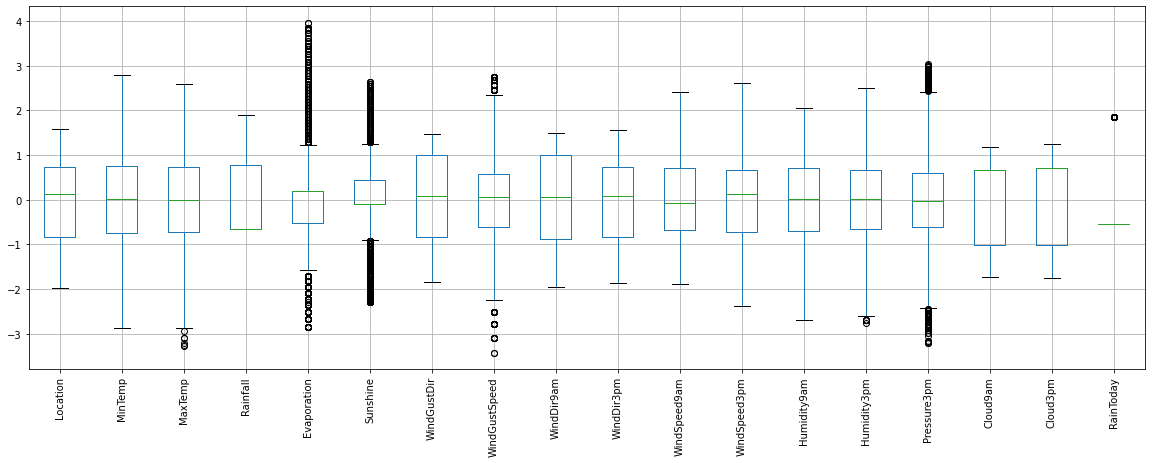

In [164]:
xc.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [165]:
y1.value_counts()

0.0    6165
1.0    1822
Name: RainTomorrow, dtype: int64

In [166]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrainw,ytrainw=smote.fit_resample(xc,y1)

In [167]:
ytrainw.value_counts()

0.0    6165
1.0    6165
Name: RainTomorrow, dtype: int64

In [168]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [169]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.7879156528791565 on random state 134


In [170]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=134)
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc=accuracy_score(y_test,predlr)
acc

0.7879156528791565

In [171]:
score=cross_val_score(lr,xtrainw,ytrainw,cv=5)
score.mean()

0.7225466342254664

In [172]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    predknc=knc.predict(x_test)
    acc=accuracy_score(y_test,predknc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8884833738848338 on random state 126


In [173]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=126)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
acc=accuracy_score(y_test,predknc)
acc

0.8884833738848338

In [174]:
score=cross_val_score(knc,xtrainw,ytrainw,cv=5)
score.mean()

0.7607461476074615

In [175]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8957826439578265 on random state 139


In [176]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=139)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
acc=accuracy_score(y_test,preddtc)
acc

0.8872668288726683

In [177]:
score=cross_val_score(dtc,xtrainw,ytrainw,cv=5)
score.mean()

0.7658556366585563

In [178]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtce=DecisionTreeClassifier(criterion="entropy")
    dtce.fit(x_train,y_train)
    preddt=dtce.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8982157339821574 on random state 157


In [179]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=157)
dtce=DecisionTreeClassifier(criterion="entropy")
dtce.fit(x_train,y_train)
preddtce=dtce.predict(x_test)
acc=accuracy_score(y_test,preddtce)
acc

0.9006488240064883

In [180]:
score=cross_val_score(dtce,xtrainw,ytrainw,cv=5)
score.mean()

0.7616382806163828

In [181]:
maxacc=0
maxrs=0
from sklearn.ensemble import RandomForestClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    rfc=RandomForestClassifier(n_estimators=200)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9501216545012166 on random state 93


In [182]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=93)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
acc

0.9464720194647201

In [183]:
score=cross_val_score(rfc,xtrainw,ytrainw,cv=5)
score.mean()

0.8202757502027576

In [184]:
maxacc=0
maxrs=0
from sklearn.ensemble import AdaBoostClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    adc=AdaBoostClassifier()
    adc.fit(x_train,y_train)
    predadc=adc.predict(x_test)
    acc=accuracy_score(y_test,predadc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8353609083536091 on random state 175


In [185]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=175)
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
acc=accuracy_score(y_test,predadc)
acc

0.8353609083536091

In [186]:
score=cross_val_score(adc,xtrainw,ytrainw,cv=5)
score.mean()

0.681021897810219

In [187]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"],"max_depth":[0,1,2,3,4,5,6,7,8],"criterion":["gini","entropy"]}
gscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [188]:
gscv.fit(xtrainw,ytrainw)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [189]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [190]:
gscv.best_estimator_

RandomForestClassifier(max_depth=8)

In [191]:
gscvpred=gscv.best_estimator_.predict(x_test)

In [192]:
print(accuracy_score(y_test,gscvpred))
print(confusion_matrix(y_test,gscvpred))
print(classification_report(y_test,gscvpred))

0.8909164639091647
[[1125  154]
 [ 115 1072]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      1279
         1.0       0.87      0.90      0.89      1187

    accuracy                           0.89      2466
   macro avg       0.89      0.89      0.89      2466
weighted avg       0.89      0.89      0.89      2466



In [193]:
score=cross_val_score(gscv.best_estimator_,xtrainw,ytrainw,cv=5)
score.mean()

0.748580697485807

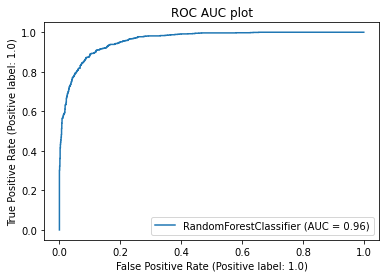

In [194]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [197]:
from sklearn.preprocessing import power_transform
xt1=power_transform(x2, method="yeo-johnson")
xt1=pd.DataFrame(xt1)
xt1.columns = x2.columns
xt1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.568421,0.063394,-0.065860,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,0.784361,...,0.148687,-1.678865,-1.692943,-1.405096,1.174785,0.705586,-0.134269,-0.027061,-0.542476,-0.543635
1,-1.568421,-1.054786,0.295847,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,-0.983463,...,-1.430228,-1.492546,-1.203853,-1.284708,0.656081,0.705586,-0.080445,0.392529,-0.542476,-0.543635
2,-1.568421,-0.029270,0.391255,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,0.700314,...,-1.749113,-1.189427,-1.709835,-1.130218,0.656081,-1.316544,0.599608,0.210969,-0.542476,-0.543635
3,-1.568421,-0.717748,0.745385,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,-0.063397,...,-1.375808,-2.064072,-0.029358,-0.430600,0.656081,0.705586,0.080903,0.742575,-0.542476,-0.543635
4,-1.568421,0.820504,1.364220,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,-0.541317,...,0.848497,-1.011381,-1.170177,-1.594683,0.656081,1.237711,0.027141,1.224291,-0.542476,-0.543635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.016329,-1.925521,0.018067,0.186311,-0.097439,-1.838176,-0.605532,0.469967,-1.591859,0.146229,...,-1.042145,-1.554249,1.136655,0.831742,0.656081,0.705586,-1.360956,0.075946,-0.542476,-0.543635
7983,1.016329,-1.772792,0.327797,0.186311,-0.097439,-0.124576,-1.460065,0.469967,-1.076782,0.146229,...,-0.755256,-1.741820,0.953981,0.631266,0.656081,0.705586,-1.215872,0.425052,-0.542476,-0.543635
7984,1.016329,-1.431382,0.578234,0.186311,-0.097439,-0.834587,-0.103212,0.469967,1.354048,-0.290718,...,-0.928319,-1.554249,0.538043,0.245431,0.656081,0.705586,-0.926387,0.680153,-0.542476,-0.543635
7985,1.016329,-0.979749,0.593593,0.186311,-0.097439,0.469851,-0.874832,0.657373,-1.076782,0.146229,...,-1.042145,-1.554249,0.271279,0.194951,-1.010872,-1.316544,-0.457681,0.664465,-0.542476,-0.543635


In [198]:
def calc_vif(xt):
    vif = pd.DataFrame()
    vif["variables"] = xt1.columns
    vif["V_I_F"] = [variance_inflation_factor(xt1.values,i) for i in range(xt1.shape[1])]
    return(vif)

In [199]:
calvif=calc_vif(xt1)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

        variables      V_I_F
0        Location   1.182564
1         MinTemp   8.177310
2         MaxTemp  23.831914
3     Evaporation   1.564659
4        Sunshine   2.096549
5     WindGustDir   1.623371
6   WindGustSpeed   2.282918
7      WindDir9am   1.335714
8      WindDir3pm   1.475003
9    WindSpeed9am   1.971095
10   WindSpeed3pm   1.962443
11    Humidity9am   3.833208
12    Humidity3pm   5.359041
13    Pressure9am  19.680506
14    Pressure3pm  18.747803
15       Cloud9am   1.973021
16       Cloud3pm   1.832938
17        Temp9am  17.394222
18        Temp3pm  30.472217
19      RainToday   1.371639
20   RainTomorrow   1.426920


18    30.472217
2     23.831914
13    19.680506
14    18.747803
17    17.394222
1      8.177310
12     5.359041
11     3.833208
6      2.282918
4      2.096549
15     1.973021
9      1.971095
10     1.962443
16     1.832938
5      1.623371
3      1.564659
8      1.475003
20     1.426920
19     1.371639
7      1.335714
0      1.182564
Name: V_I_F, dtype: float64

In [200]:
xt1.drop(["Temp3pm","Pressure9am"],axis=1,inplace=True)

In [201]:
calvif=calc_vif(xt1)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

        variables      V_I_F
0        Location   1.178224
1         MinTemp   7.980541
2         MaxTemp   9.198056
3     Evaporation   1.547815
4        Sunshine   2.088487
5     WindGustDir   1.601461
6   WindGustSpeed   2.243658
7      WindDir9am   1.311904
8      WindDir3pm   1.410463
9    WindSpeed9am   1.965338
10   WindSpeed3pm   1.951877
11    Humidity9am   3.366857
12    Humidity3pm   3.705799
13    Pressure3pm   1.441080
14       Cloud9am   1.972798
15       Cloud3pm   1.829795
16        Temp9am  15.873428
17      RainToday   1.353232
18   RainTomorrow   1.420083


16    15.873428
2      9.198056
1      7.980541
12     3.705799
11     3.366857
6      2.243658
4      2.088487
14     1.972798
9      1.965338
10     1.951877
15     1.829795
5      1.601461
3      1.547815
13     1.441080
18     1.420083
8      1.410463
17     1.353232
7      1.311904
0      1.178224
Name: V_I_F, dtype: float64

In [202]:
xt1.drop(["Temp9am"],axis=1,inplace=True)

In [203]:
calvif=calc_vif(xt1)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

        variables     V_I_F
0        Location  1.169232
1         MinTemp  4.357667
2         MaxTemp  5.355670
3     Evaporation  1.547797
4        Sunshine  2.086600
5     WindGustDir  1.601451
6   WindGustSpeed  2.212549
7      WindDir9am  1.311903
8      WindDir3pm  1.410397
9    WindSpeed9am  1.940932
10   WindSpeed3pm  1.913858
11    Humidity9am  2.410091
12    Humidity3pm  3.038734
13    Pressure3pm  1.432472
14       Cloud9am  1.948836
15       Cloud3pm  1.824363
16      RainToday  1.348156
17   RainTomorrow  1.419925


2     5.355670
1     4.357667
12    3.038734
11    2.410091
6     2.212549
4     2.086600
14    1.948836
9     1.940932
10    1.913858
15    1.824363
5     1.601451
3     1.547797
13    1.432472
17    1.419925
8     1.410397
16    1.348156
7     1.311903
0     1.169232
Name: V_I_F, dtype: float64

In [204]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc1=sc.fit_transform(xt1)
xc1=pd.DataFrame(xc1)
xc1.columns=xt1.columns
xc1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,-1.568421,0.063394,-0.065860,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,0.784361,0.670390,0.148687,-1.678865,-1.405096,1.174785,0.705586,-0.542476,-0.543635
1,-1.568421,-1.054786,0.295847,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,-0.983463,0.472699,-1.430228,-1.492546,-1.284708,0.656081,0.705586,-0.542476,-0.543635
2,-1.568421,-0.029270,0.391255,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,0.700314,0.863753,-1.749113,-1.189427,-1.130218,0.656081,-1.316544,-0.542476,-0.543635
3,-1.568421,-0.717748,0.745385,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,-0.063397,-0.966158,-1.375808,-2.064072,-0.430600,0.656081,0.705586,-0.542476,-0.543635
4,-1.568421,0.820504,1.364220,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,-0.541317,0.270193,0.848497,-1.011381,-1.594683,0.656081,1.237711,-0.542476,-0.543635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.016329,-1.925521,0.018067,0.186311,-0.097439,-1.838176,-0.605532,0.469967,-1.591859,0.146229,-0.720808,-1.042145,-1.554249,0.831742,0.656081,0.705586,-0.542476,-0.543635
7983,1.016329,-1.772792,0.327797,0.186311,-0.097439,-0.124576,-1.460065,0.469967,-1.076782,0.146229,-0.966158,-0.755256,-1.741820,0.631266,0.656081,0.705586,-0.542476,-0.543635
7984,1.016329,-1.431382,0.578234,0.186311,-0.097439,-0.834587,-0.103212,0.469967,1.354048,-0.290718,-0.966158,-0.928319,-1.554249,0.245431,0.656081,0.705586,-0.542476,-0.543635
7985,1.016329,-0.979749,0.593593,0.186311,-0.097439,0.469851,-0.874832,0.657373,-1.076782,0.146229,-1.225561,-1.042145,-1.554249,0.194951,-1.010872,-1.316544,-0.542476,-0.543635


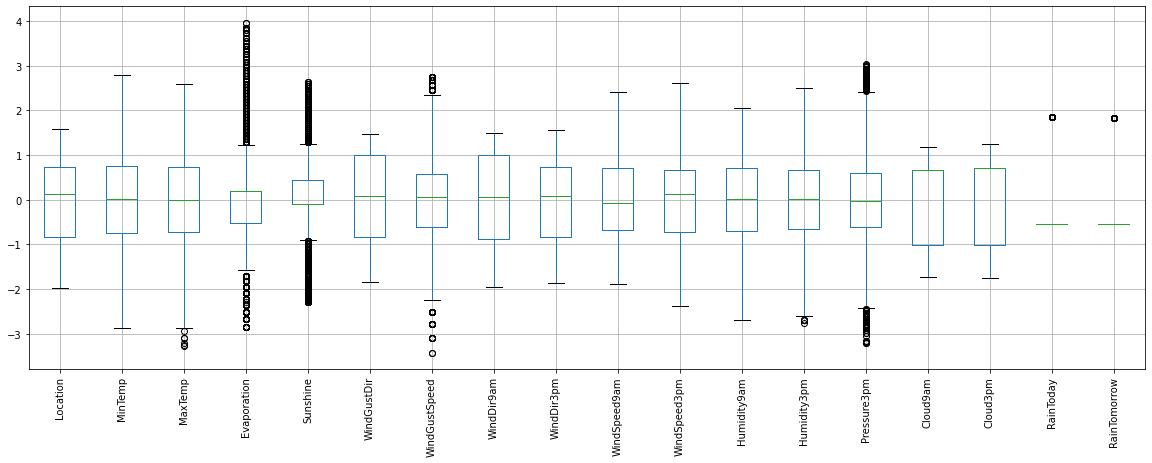

In [205]:
xc1.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [195]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error , mean_absolute_error
from sklearn.model_selection import train_test_split

In [207]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=lr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.5070087508874372 on random state 108


In [208]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=108)
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(lr.score(x_train,y_train))
print(r2_score(y_test,predlr))

0.5081017875623546
0.4655313988669191


In [209]:
score=cross_val_score(lr,x2,y2,cv=5)
score.mean()

0.491639937481651

In [210]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    acc=dtr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 1.0 on random state 0


In [211]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=0)
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print(dtr.score(x_train,y_train))
print(r2_score(y_test,pred))


1.0
0.3776071906645325


In [212]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    acc=dtr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 1.0 on random state 0


In [213]:
x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=0)
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print(dtr.score(x_train,y_train))
print(r2_score(y_test,pred))


1.0
0.33899025454256415


In [214]:
score=cross_val_score(dtr,x2,y2,cv=5)
score.mean()

0.2413730597670864

In [215]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    predrfr=rfr.predict(x_test)
    acc=rfr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9535987868340282 on random state 166


In [219]:
x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=166)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print(rfr.score(x_train,y_train))
print(r2_score(y_test,predrfr))

0.951219065911758
0.5494614850519153


In [220]:
score=cross_val_score(rfr,xc1,y2,cv=5)
score.mean()

0.5760921312253332

In [216]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
rd = Ridge()
ls= Lasso()

In [217]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    ls.fit(x_train,y_train)
    predls=ls.predict(x_test)
    acc=ls.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.21686614208875155 on random state 56


In [221]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=i)
    ls.fit(x_train,y_train)
    predls=ls.predict(x_test)
    acc=ls.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.45065912910306116 on random state 167


In [222]:
x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=167)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print(ls.score(x_train,y_train))
print(r2_score(y_test,predls))

0.45065912910306116
0.4311921266635106


In [223]:
score=cross_val_score(ls,x2,y2,cv=5)
score.mean()

0.17811404450396504

In [224]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    acc=rd.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.5081013224142508 on random state 108


In [225]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc1,y2,test_size=0.2,random_state=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    acc=rd.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.507008737199907 on random state 108


In [226]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=108)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print(rd.score(x_train,y_train))
print(r2_score(y_test,predrd))

0.5081013224142508
0.4655362462215583


In [227]:
score=cross_val_score(rd,x2,y2,cv=5)
score.mean()

0.49162832611621904

In [228]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"]}
gscv1=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring="accuracy")

In [229]:
gscv1.fit(xc1,y2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [230]:
gscv1.best_params_

{'max_features': 'auto'}

In [231]:
gscv1.best_estimator_

RandomForestRegressor()

In [234]:
import joblib

In [236]:
joblib.dump(rfr,"rain.pkl")

['rain.pkl']